In [158]:
# Librerias para manejo de datos
import pandas as pd
import random
import numpy as np
import sklearn
# Librerias para preprocesamiento y visualizacion de datos
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Librerias para implementar redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

# Preparando informacion


In [106]:
data = pd.read_csv('data/dataset_clean.csv')
data.head()

,title,production_date,runtime_minutes,director,average_rating,num_votes,approval_index,prod_budget,domestic_gross,worldwide_gross,...,music,musical,mystery,news,romance,sci-fi,sport,thriller,war,western
0,Avatar: The Way of Water,1670544000,192.0,664,7.8,277543.0,7.061101,460000000,667830256,2265935552,...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: On Stranger Tides,1305849600,137.0,1445,6.6,533763.0,6.272064,379000000,241071802,1045713802,...,0,0,0,0,0,0,0,0,0,0
2,Avengers: Age of Ultron,1429660800,141.0,899,7.3,870573.0,7.214013,365000000,459005868,1395316979,...,0,0,0,0,0,1,0,0,0,0
3,Justice League,1510531200,120.0,1829,6.1,456977.0,5.717212,300000000,229024295,655945209,...,0,0,0,0,0,0,0,0,0,0
4,Spectre,1444089600,148.0,1531,6.8,445461.0,6.375644,300000000,200074175,879077344,...,0,0,0,0,0,0,0,1,0,0


In [139]:
X = data[['prod_budget', 'domestic_gross', 'worldwide_gross', 'director', 'runtime_minutes', 'approval_index', 'num_votes']]
y = data[['average_rating']]
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)
train_labels, train_samples = shuffle(y_train,X_train )

seed_value = 2302
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
sklearn.utils.check_random_state(seed_value)


RandomState(MT19937) at 0x2B2E68440

# Modelos

## Modelo 1

In [153]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='tanh'),
    BatchNormalization(),
    Dense(1, ) 
])
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 16)                128       
                                                                 
 batch_normalization_59 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_93 (Dense)            (None, 128)               2176      
                                                                 
 batch_normalization_60 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_94 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_61 (Ba  (None, 64)              

In [155]:
model.compile(
    optimizer='adam', loss='mean_squared_error', 
    metrics=['mean_squared_error']
)
batched_history = model.fit(x=train_samples, y=train_labels, batch_size=40, epochs=200, validation_split=0.2 ,verbose=2)

Epoch 1/200


65/65 - 1s - loss: 37.8510 - mean_squared_error: 37.8510 - val_loss: 30.2548 - val_mean_squared_error: 30.2548 - 586ms/epoch - 9ms/step
Epoch 2/200
65/65 - 0s - loss: 25.6909 - mean_squared_error: 25.6909 - val_loss: 14.7027 - val_mean_squared_error: 14.7027 - 81ms/epoch - 1ms/step
Epoch 3/200
65/65 - 0s - loss: 11.1424 - mean_squared_error: 11.1424 - val_loss: 3.6316 - val_mean_squared_error: 3.6316 - 77ms/epoch - 1ms/step
Epoch 4/200
65/65 - 0s - loss: 2.9880 - mean_squared_error: 2.9880 - val_loss: 1.1174 - val_mean_squared_error: 1.1174 - 75ms/epoch - 1ms/step
Epoch 5/200
65/65 - 0s - loss: 1.2569 - mean_squared_error: 1.2569 - val_loss: 1.0753 - val_mean_squared_error: 1.0753 - 73ms/epoch - 1ms/step
Epoch 6/200
65/65 - 0s - loss: 1.0877 - mean_squared_error: 1.0877 - val_loss: 1.0347 - val_mean_squared_error: 1.0347 - 75ms/epoch - 1ms/step
Epoch 7/200
65/65 - 0s - loss: 1.0661 - mean_squared_error: 1.0661 - val_loss: 1.0035 - val_mean_squared_error: 1.0035 - 75ms/epoch - 1ms/step


### Evaluando el modelo


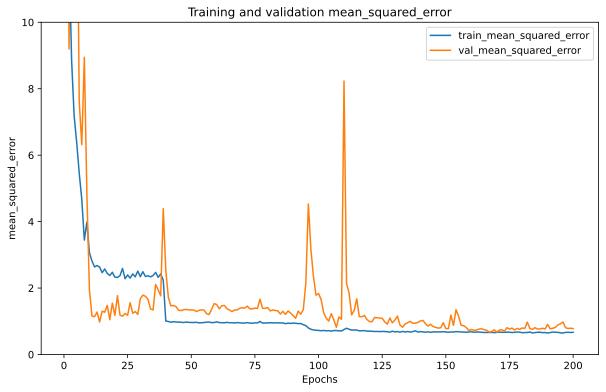

In [154]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
		plt.figure(figsize=(10, 6))
		train_metrics = history.history[metric]
		val_metrics = history.history['val_'+metric]
		epochs = range(1, len(train_metrics) + 1)
		plt.plot(epochs, train_metrics)
		plt.plot(epochs, val_metrics)
		plt.title('Training and validation '+ metric)
		plt.xlabel("Epochs")
		plt.ylabel(metric)
		plt.legend(["train_"+metric, 'val_'+metric])
		plt.ylim([0,10])
		plt.show()

plot_metric(batched_history, 'mean_squared_error')

### Predicciones

In [131]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("test loss, test mse:", results)
predictions = model.predict(X_test)



Evaluate on test data
test loss, test mse: [0.7180644869804382, 0.7180644869804382]
26/26 [==============================] - 0s 391us/step


## Modelo 2

In [163]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
		BatchNormalization(),
    Dense(64, activation='relu'),
		BatchNormalization(),
    Dense(32, activation='tanh'),
		BatchNormalization(),
    Dense(1) 
])
model.summary()
early_stopping = EarlyStopping(
    monitor='mean_absolute_error', 
    patience=20, 
    restore_best_weights=True,
)
model.compile(
    optimizer='adam', loss='mean_absolute_error', 
    metrics=['mean_absolute_error']
)
batched_history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=1,
    callbacks=[early_stopping] 
)


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 16)                128       
                                                                 
 batch_normalization_87 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_128 (Dense)           (None, 128)               2176      
                                                                 
 batch_normalization_88 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dense_129 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_89 (Ba  (None, 64)              

Epoch 1/200
61/61 [==============================] - 1s 3ms/step - loss: 6.0899 - mean_absolute_error: 6.0899 - val_loss: 5.3977 - val_mean_absolute_error: 5.3977
Epoch 2/200
61/61 [==============================] - 0s 1ms/step - loss: 5.1912 - mean_absolute_error: 5.1912 - val_loss: 4.7882 - val_mean_absolute_error: 4.7882
Epoch 3/200
61/61 [==============================] - 0s 1ms/step - loss: 3.7776 - mean_absolute_error: 3.7776 - val_loss: 2.6719 - val_mean_absolute_error: 2.6719
Epoch 4/200
61/61 [==============================] - 0s 1ms/step - loss: 2.0152 - mean_absolute_error: 2.0152 - val_loss: 1.2241 - val_mean_absolute_error: 1.2241
Epoch 5/200
61/61 [==============================] - 0s 1ms/step - loss: 0.9416 - mean_absolute_error: 0.9416 - val_loss: 0.8772 - val_mean_absolute_error: 0.8772
Epoch 6/200
61/61 [==============================] - 0s 1ms/step - loss: 0.8234 - mean_absolute_error: 0.8234 - val_loss: 0.7863 - val_mean_absolute_error: 0.7863
Epoch 7/200
61/61 [===

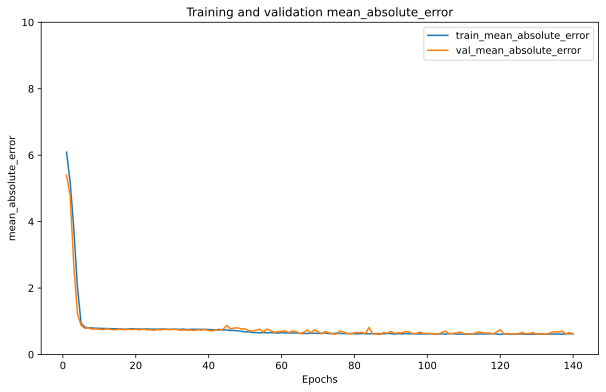

In [165]:
plot_metric(batched_history, 'mean_absolute_error')

## Modelo 3

In [172]:
model = Sequential([
    Dense(units=16, input_shape=(7,), activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
		BatchNormalization(),
    Dense(64, activation='relu'),
		Dropout(0.2),
		BatchNormalization(),
    Dense(128, activation='tanh'),

    Dense(1) 
])
model.summary()
early_stopping = EarlyStopping(
    monitor='huber_loss', 
    patience=20, 
    restore_best_weights=True,
)
model.compile(
    optimizer='adam', loss='huber_loss', 
    metrics=['mean_absolute_error']
)
batched_history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=1,
    callbacks=[early_stopping] 
)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_162 (Dense)           (None, 16)                128       
                                                                 
 batch_normalization_111 (B  (None, 16)                64        
 atchNormalization)                                              
                                                                 
 dense_163 (Dense)           (None, 128)               2176      
                                                                 
 batch_normalization_112 (B  (None, 128)               512       
 atchNormalization)                                              
                                                                 
 dense_164 (Dense)           (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)              

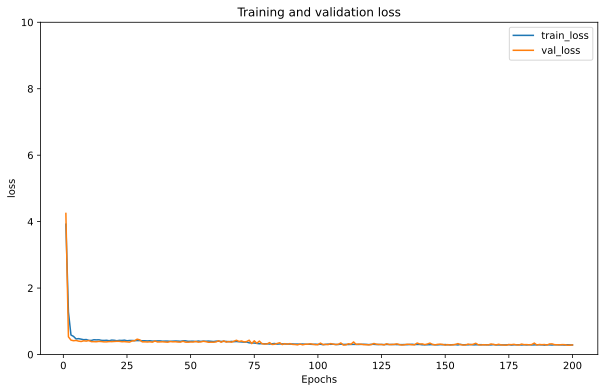

In [173]:
plot_metric(batched_history, 'loss')